# Homework 2



# Step 2
utilizing the "QMNIST" dataset

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load QMNIST dataset and preprocess
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 105126090.23it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 12778582.53it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 103770649.03it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 12804660.13it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


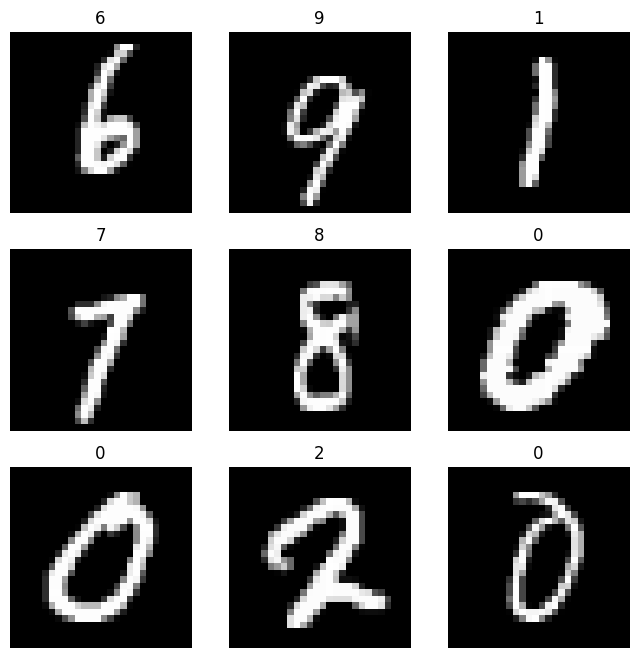

In [3]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define labels map
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load QMNIST dataset
train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)

# Create a figure to plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Iterate over the dataset and plot samples
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

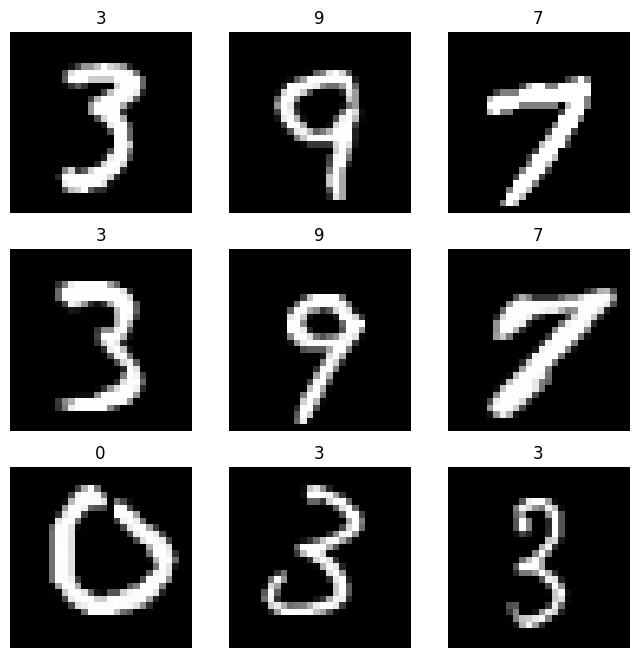

In [4]:
# Create a figure to plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Iterate over the test dataset and plot samples
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [5]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0337111470103264
Epoch 1, Batch 200, Loss: 0.4386751553416252
Epoch 1, Batch 300, Loss: 0.4141509573161602
Epoch 1, Batch 400, Loss: 0.33490343898534775
Epoch 1, Batch 500, Loss: 0.31445020735263823
Epoch 1, Batch 600, Loss: 0.28450584813952445
Epoch 1, Batch 700, Loss: 0.26106818273663523
Epoch 1, Batch 800, Loss: 0.2644056344777346
Epoch 1, Batch 900, Loss: 0.24439160391688347
Epoch 2, Batch 100, Loss: 0.2142498016357422
Epoch 2, Batch 200, Loss: 0.21004280984401702
Epoch 2, Batch 300, Loss: 0.2012569072842598
Epoch 2, Batch 400, Loss: 0.18451555678620934
Epoch 2, Batch 500, Loss: 0.19413704082369804
Epoch 2, Batch 600, Loss: 0.18245120249688626
Epoch 2, Batch 700, Loss: 0.1646643778309226
Epoch 2, Batch 800, Loss: 0.16791698545217515
Epoch 2, Batch 900, Loss: 0.16642786737531423
Epoch 3, Batch 100, Loss: 0.14530807988718153
Epoch 3, Batch 200, Loss: 0.14295325916260482
Epoch 3, Batch 300, Loss: 0.14824189875274896
Epoch 3, Batch 400, Loss: 0.1481409941613

In [7]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on training set: {round(correct / total * 100, 3)}%')

Accuracy on training set: 98.547%


In [8]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {round(correct / total * 100, 3)}%')

Accuracy on test set: 96.987%


In [9]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

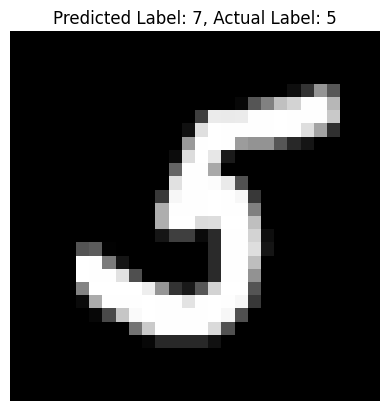

In [10]:
# Get one test image and its label
image, label = images[0], labels[0]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[0]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

# Step 3
**Report on the results in terms of prediction accuracy on the train and test datasets:**
- Accuracy on training set: 98.547%
- Accuracy on test set: 96.987%

# Step 4
**Chosen Proposed modification:**
- Increase the current number of nodes in the layer to 256

**Hypothesize how it would change the performance results:**
- Expectation is that the performance would be better. Increasing the number of units should increase the representation power of the model, and thus capture complex relationships between the input features.

# Step 5
Modify the model based on the chosen method and train



In [11]:
# Define the neural network architecture
class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP2()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 0.8315333399176598
Epoch 1, Batch 200, Loss: 0.3892825858294964
Epoch 1, Batch 300, Loss: 0.3312388211488724
Epoch 1, Batch 400, Loss: 0.29238864809274673
Epoch 1, Batch 500, Loss: 0.25460391253232956
Epoch 1, Batch 600, Loss: 0.23815783731639384
Epoch 1, Batch 700, Loss: 0.20803514167666434
Epoch 1, Batch 800, Loss: 0.18777876071631908
Epoch 1, Batch 900, Loss: 0.1991307683289051
Epoch 2, Batch 100, Loss: 0.16356412880122662
Epoch 2, Batch 200, Loss: 0.15090241089463233
Epoch 2, Batch 300, Loss: 0.1390621871314943
Epoch 2, Batch 400, Loss: 0.1434594888985157
Epoch 2, Batch 500, Loss: 0.1489667522534728
Epoch 2, Batch 600, Loss: 0.14218306321650742
Epoch 2, Batch 700, Loss: 0.1353009326197207
Epoch 2, Batch 800, Loss: 0.14568932274356483
Epoch 2, Batch 900, Loss: 0.1307685891725123
Epoch 3, Batch 100, Loss: 0.11662997851148248
Epoch 3, Batch 200, Loss: 0.11852314038202166
Epoch 3, Batch 300, Loss: 0.10695866728201509
Epoch 3, Batch 400, Loss: 0.104349537258967

# Step 6
**Report on the results of the modified model and if it matches your hypothesis:**
- Accuracy on training set: 99.105%
- Accuracy on test set: 97.52%



# Step 7
Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

**I iteratively experimented with various hyperparameters, such as optimizers, loss functions, dropout rates, and activation functions, adjusting them based on the outcomes of the preceding experiments to observe the impact on performance.**

## Experiment 1
- Using LeakyRELU as the activation function

In [12]:
# Define the neural network architecture
class MLP3(nn.Module):
    def __init__(self):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        m = nn.LeakyReLU(0.1)
        x = m(self.fc1(x))
        x = m(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP3()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 0.7632160739600659
Epoch 1, Batch 200, Loss: 0.39074928596615793
Epoch 1, Batch 300, Loss: 0.3213037703931332
Epoch 1, Batch 400, Loss: 0.25640905074775217
Epoch 1, Batch 500, Loss: 0.24245190277695655
Epoch 1, Batch 600, Loss: 0.20931258969008923
Epoch 1, Batch 700, Loss: 0.20887336071580648
Epoch 1, Batch 800, Loss: 0.1886785141006112
Epoch 1, Batch 900, Loss: 0.18757147759199141
Epoch 2, Batch 100, Loss: 0.14128543565049767
Epoch 2, Batch 200, Loss: 0.14673436660319567
Epoch 2, Batch 300, Loss: 0.13652560468763114
Epoch 2, Batch 400, Loss: 0.13773572657257319
Epoch 2, Batch 500, Loss: 0.13382803009822963
Epoch 2, Batch 600, Loss: 0.12957379762083293
Epoch 2, Batch 700, Loss: 0.14438747867010535
Epoch 2, Batch 800, Loss: 0.13322317080572246
Epoch 2, Batch 900, Loss: 0.12175315452739596
Epoch 3, Batch 100, Loss: 0.09873482514172792
Epoch 3, Batch 200, Loss: 0.09130225039087236
Epoch 3, Batch 300, Loss: 0.1249994841683656
Epoch 3, Batch 400, Loss: 0.1095585144

**EExperiment 1, Finding: The model's performance showed very slight alterations.**

## Experiment 2
- Adding dropout
- Using RELU as activation function

In [13]:
# Define the neural network architecture
class MLP4(nn.Module):
    def __init__(self):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP4()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 1.1301324105262756
Epoch 1, Batch 200, Loss: 0.5579663163423538
Epoch 1, Batch 300, Loss: 0.4410348604619503
Epoch 1, Batch 400, Loss: 0.42716115832328794
Epoch 1, Batch 500, Loss: 0.39324299186468126
Epoch 1, Batch 600, Loss: 0.3758322285115719
Epoch 1, Batch 700, Loss: 0.35866938367486
Epoch 1, Batch 800, Loss: 0.3222226497530937
Epoch 1, Batch 900, Loss: 0.309950697645545
Epoch 2, Batch 100, Loss: 0.30416439563035963
Epoch 2, Batch 200, Loss: 0.3162388395518064
Epoch 2, Batch 300, Loss: 0.27295483633875844
Epoch 2, Batch 400, Loss: 0.25656445875763895
Epoch 2, Batch 500, Loss: 0.2626371325179935
Epoch 2, Batch 600, Loss: 0.2718454971909523
Epoch 2, Batch 700, Loss: 0.2693655971437693
Epoch 2, Batch 800, Loss: 0.2443015395104885
Epoch 2, Batch 900, Loss: 0.238337564393878
Epoch 3, Batch 100, Loss: 0.23580751232802868
Epoch 3, Batch 200, Loss: 0.23377230532467366
Epoch 3, Batch 300, Loss: 0.23278517082333564
Epoch 3, Batch 400, Loss: 0.22495040286332368
Epoch

**Experiment 2, Observation: Very slight change in model performance here aswell (similar with experiment 1).**

## Experiment 2
- Optimizer : SGD with Momentum
- Remove Dropout
- Keep Loss Function as it is. (CrossEntropyLoss is a good loss function for image classification tasks)
- Change epochs to 10

In [14]:
# Define the neural network architecture
class MLP5(nn.Module):
    def __init__(self):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP5()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the neural network
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on train set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on training set: {round(correct / total * 100, 3)}%')

# Evaluate the model on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'\nAccuracy on test set: {round(correct / total * 100, 3)}%')

Epoch 1, Batch 100, Loss: 2.224481210708618
Epoch 1, Batch 200, Loss: 1.9270283818244933
Epoch 1, Batch 300, Loss: 1.3797918730974197
Epoch 1, Batch 400, Loss: 0.9533278000354767
Epoch 1, Batch 500, Loss: 0.7103223320841789
Epoch 1, Batch 600, Loss: 0.5965730234980583
Epoch 1, Batch 700, Loss: 0.5220018112659455
Epoch 1, Batch 800, Loss: 0.4797197350859642
Epoch 1, Batch 900, Loss: 0.4348887175321579
Epoch 2, Batch 100, Loss: 0.41229547426104546
Epoch 2, Batch 200, Loss: 0.39053060963749886
Epoch 2, Batch 300, Loss: 0.38432685181498527
Epoch 2, Batch 400, Loss: 0.35867737501859664
Epoch 2, Batch 500, Loss: 0.3665939424932003
Epoch 2, Batch 600, Loss: 0.3753409294784069
Epoch 2, Batch 700, Loss: 0.34949454620480536
Epoch 2, Batch 800, Loss: 0.3416540056467056
Epoch 2, Batch 900, Loss: 0.3300665873289108
Epoch 3, Batch 100, Loss: 0.3471053323149681
Epoch 3, Batch 200, Loss: 0.34517440780997277
Epoch 3, Batch 300, Loss: 0.31204001858830455
Epoch 3, Batch 400, Loss: 0.32280624479055403
Epo

##### **Experiment 3, Result: The observed decrease in model performance indicates that Adam significantly outperforms SGD with momentum.** **bold text**